In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_data='D://LP-4-DL-DataSet//mnist-jpg//mnist-jpg//test'
train_data='D://LP-4-DL-DataSet//mnist-jpg//mnist-jpg//train'

In [5]:
load = ImageDataGenerator(rescale=1.0/255)
test_generator=load.flow_from_directory(
 test_data,
    target_size=(28,28),
    batch_size=2000,
    shuffle=True,
    class_mode='categorical',
    color_mode='grayscale'
    
)

train_generator=load.flow_from_directory(
    train_data,
     target_size=(28,28),
    class_mode='categorical',
    batch_size=10000,
    shuffle=True,
     color_mode='grayscale'
    
    
    
)

Found 10000 images belonging to 10 classes.
Found 60000 images belonging to 10 classes.


In [7]:
x_train,y_train=train_generator[0]
x_test,y_test=test_generator[0]

In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                346176    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [25]:
model.compile(optimizer='adam' ,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train , y_train , epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
313/313 [==============================] - 3s 8ms/step - loss: 0.5841 - accuracy: 0.8231 - val_loss: 0.2387 - val_accuracy: 0.9365
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2582 - accuracy: 0.9223 - val_loss: 0.1634 - val_accuracy: 0.9540
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1770 - accuracy: 0.9458 - val_loss: 0.1301 - val_accuracy: 0.9630
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1276 - accuracy: 0.9601 - val_loss: 0.1172 - val_accuracy: 0.9675
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0992 - accuracy: 0.9708 - val_loss: 0.1032 - val_accuracy: 0.9745
Epoch 6/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0829 - accuracy: 0.9720 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.1003 - val_accuracy: 0.9730
Epoch 

In [26]:
loss ,accuracy =  model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.1014 - accuracy: 0.9730


In [27]:
predicted_value=model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


Actual 7
predicted 7


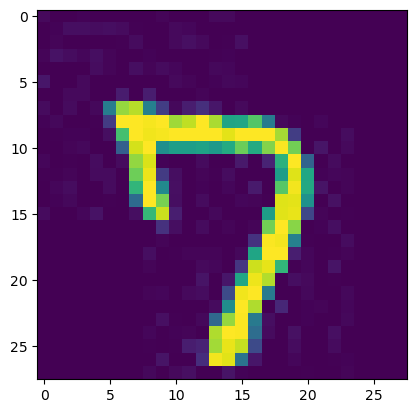

In [31]:
n=24
plt.imshow(x_test[n])
print('Actual',np.argmax(y_test[n]))
print('predicted',np.argmax(predicted_value[n]))